## Wczytanie danych

Na początku importujemy dane z pliku `Online Retail.xlsx`. Wczytujemy 5000 rekordów, aby szybko przeanalizować strukturę danych i rozpocząć eksplorację. Używamy biblioteki `pandas`, która jest standardem w analizie danych.


In [15]:
import pandas as pd

# Wczytaj tylko pierwsze 5000 wierszy z pliku Excel
df = pd.read_excel("../data/Online Retail.xlsx", nrows=5000)

# Szybki podgląd danych
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Braki danych

Weryfikujemy, w których kolumnach znajdują się braki danych (NaN). To pozwoli podjąć decyzję, które kolumny trzeba oczyścić lub uzupełnić.


In [2]:
df.isnull().sum()


InvoiceNo         0
StockCode         0
Description      12
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1205
Country           0
dtype: int64

## Statystyki opisowe

Wyświetlamy statystyki opisowe dla wszystkich kolumn. Otrzymujemy m.in. liczbę unikalnych wartości, średnie, minimum i maksimum. Pozwala to lepiej zrozumieć rozkład danych.


In [3]:
df.describe(include="all")


C:\Users\tymon\AppData\Local\Temp\ipykernel_14936\1519091745.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,5000.0,5000.0,4988,5000.000000,5000,5000.000000,3795.000000,5000
unique,300.0,1595.0,1591,NaN,265,NaN,NaN,7
top,536592.0,22632.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-01 17:06:00,NaN,NaN,United Kingdom
freq,592.0,39.0,35,NaN,592,NaN,NaN,4837
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-02 18:08:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.185800,NaN,3.792314,15906.281950,NaN
std,NaN,NaN,NaN,144.940788,NaN,13.211720,1732.068892,NaN
min,NaN,NaN,NaN,-9360.000000,NaN,0.000000,12431.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14606.000000,NaN


## Najczęstsze kraje

Analizujemy, z jakich krajów pochodzi najwięcej zamówień. Pomoże to zrozumieć strukturę klientów.


In [4]:
df["Country"].value_counts().head(10)


United Kingdom    4837
Norway              73
Germany             30
EIRE                24
France              20
Australia           14
Netherlands          2
Name: Country, dtype: int64

## Wykrywanie zwrotów

Filtrowanie rekordów z ujemną ilością (`Quantity < 0`) pozwala zidentyfikować zwroty lub błędne wpisy w danych.


In [5]:
df[df["Quantity"] < 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


## Wizualizacja: Top 10 krajów

Tworzymy wykres słupkowy pokazujący 10 krajów z największą liczbą transakcji. Pozwala to łatwo wychwycić dominujące rynki.


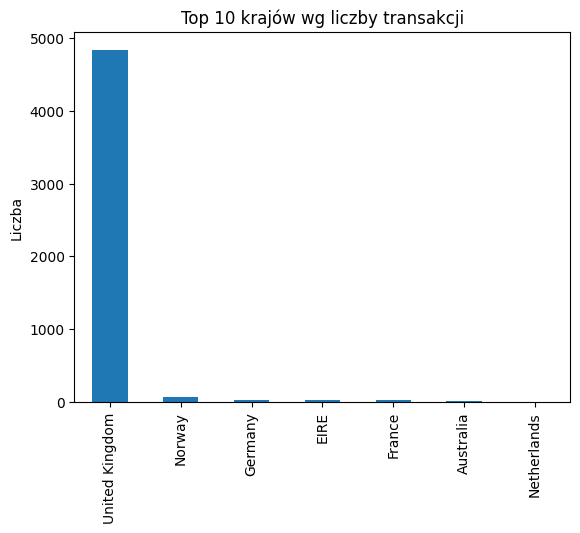

In [6]:
import matplotlib.pyplot as plt

df["Country"].value_counts().head(10).plot(kind='bar', title="Top 10 krajów wg liczby transakcji")
plt.ylabel("Liczba")
plt.show()


## Czyszczenie danych

Na tym etapie przygotowujemy dane do dalszej analizy i modelowania. Wykonujemy następujące operacje:

1. **Usunięcie braków danych** – eliminujemy wszystkie wiersze zawierające puste wartości (`NaN`), które mogłyby zakłócić analizę.
2. **Filtracja anulowanych transakcji** – transakcje anulowane są oznaczane fakturami rozpoczynającymi się od litery "C". Zostają one wykluczone z danych.
3. **Usunięcie ujemnych ilości** – wartości `Quantity < 0` oznaczają zwroty lub błędy. Skupiamy się na rzeczywistych zakupach.
4. **Usunięcie nieoznaczonych klientów** – rekordy bez przypisanego `CustomerID` są pomijane, ponieważ są bezużyteczne dla analizy lojalności i segmentacji klientów.

Po tych krokach otrzymujemy zbiór danych nadający się do dalszego przetwarzania i budowy modeli predykcyjnych.


In [7]:
# 1. Usuwamy wiersze z brakami danych
df_clean = df.dropna()

# 2. Usuwamy anulowane faktury (zaczynają się od litery "C")
df_clean = df_clean[~df_clean["InvoiceNo"].astype(str).str.startswith("C")]

# 3. Usuwamy wiersze z ujemną ilością
df_clean = df_clean[df_clean["Quantity"] > 0]

# 4. Usuwamy transakcje bez przypisanego klienta
df_clean = df_clean[df_clean["CustomerID"].notnull()]

# Podgląd efektu czyszczenia
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    3725 non-null   object        
 1   StockCode    3725 non-null   object        
 2   Description  3725 non-null   object        
 3   Quantity     3725 non-null   int64         
 4   InvoiceDate  3725 non-null   datetime64[ns]
 5   UnitPrice    3725 non-null   float64       
 6   CustomerID   3725 non-null   float64       
 7   Country      3725 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 261.9+ KB


## Dodanie wartości transakcji (`TotalPrice`)

W celu lepszej analizy zachowań zakupowych klientów tworzymy nową kolumnę `TotalPrice`. Obliczamy ją jako iloczyn `Quantity` (ilość zakupionego towaru) oraz `UnitPrice` (cena jednostkowa).

Dzięki temu uzyskujemy informację o rzeczywistej wartości każdej pojedynczej transakcji, co jest kluczowe m.in. dla segmentacji klientów, analizy przychodów czy modelowania wartości klienta (CLV).


In [8]:
df_clean["TotalPrice"] = df_clean["Quantity"] * df_clean["UnitPrice"]
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Agregacja danych po kliencie (`CustomerID`)

Aby lepiej zrozumieć wartość poszczególnych klientów, agregujemy dane na poziomie `CustomerID`. Tworzymy następujące metryki:

- **Frequency**: liczba unikalnych transakcji dokonanych przez klienta.
- **TotalQuantity**: suma wszystkich zakupionych produktów.
- **TotalSpend**: łączna wartość wszystkich transakcji klienta.

Dzięki temu możemy zidentyfikować naszych najcenniejszych klientów oraz rozpocząć segmentację lub przygotować dane pod model predykcyjny.


In [9]:
# Grupujemy dane po kliencie
customer_summary = df_clean.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",              # liczba unikalnych transakcji (częstotliwość)
    "Quantity": "sum",                   # łączna liczba produktów
    "TotalPrice": "sum"                  # łączna wartość zakupów
}).reset_index()

# Zmieniamy nazwy kolumn dla przejrzystości
customer_summary.columns = ["CustomerID", "Frequency", "TotalQuantity", "TotalSpend"]

# Sortujemy po największych wydatkach
customer_summary.sort_values(by="TotalSpend", ascending=False).head()


,CustomerID,Frequency,TotalQuantity,TotalSpend
71,15061.0,6,5475,9407.34
38,13777.0,7,3348,6585.16
158,17850.0,34,1733,5391.21
105,16029.0,3,1936,4271.52
110,16210.0,1,1070,2474.74


## Wizualizacja: Top 10 klientów według wartości zakupów

Poniższy wykres przedstawia 10 klientów, którzy wygenerowali największą łączną wartość sprzedaży. Takie dane są kluczowe dla strategii retencji, kampanii marketingowych czy personalizacji ofert.

Wartość została wyrażona na podstawie kolumny `TotalSpend`, będącej iloczynem `Quantity` i `UnitPrice`.


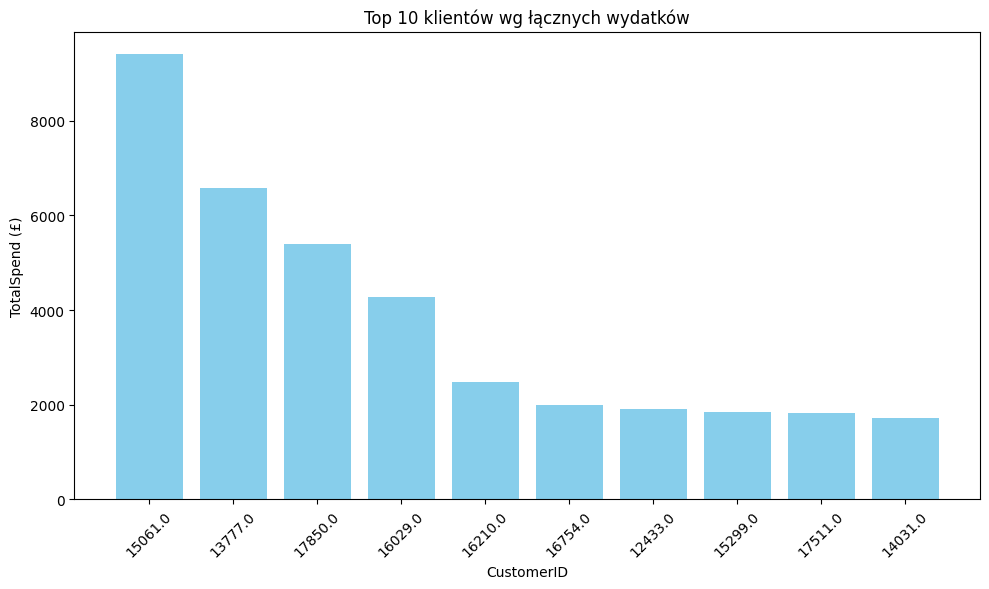

In [10]:
import matplotlib.pyplot as plt

# Wybieramy Top 10 klientów
top10 = customer_summary.sort_values(by="TotalSpend", ascending=False).head(10)

# Rysujemy wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(top10["CustomerID"].astype(str), top10["TotalSpend"], color="skyblue")
plt.title("Top 10 klientów wg łącznych wydatków")
plt.xlabel("CustomerID")
plt.ylabel("TotalSpend (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Segmentacja klientów wg wartości zakupów

Dzielimy klientów na trzy grupy na podstawie całkowitych wydatków (`TotalSpend`):

- **Top Spenders**: klienci generujący największe przychody.
- **Mid Spenders**: klienci o średniej wartości zakupów.
- **Low Spenders**: klienci o najniższej aktywności zakupowej.

Wykorzystujemy funkcję `qcut()` z biblioteki `pandas`, która automatycznie dzieli dane na równe tercyle.


In [11]:
# Tworzymy segmenty klientów wg TotalSpend – na podstawie tercyli
customer_summary["SpenderSegment"] = pd.qcut(customer_summary["TotalSpend"], 
                                              q=3, 
                                              labels=["Low", "Mid", "Top"])

# Sprawdzenie liczby klientów w każdej grupie
customer_summary["SpenderSegment"].value_counts()

Low    60
Top    60
Mid    59
Name: SpenderSegment, dtype: int64

## RFM (Recency, Frequency, Monetary) Analysis

Model RFM klasyfikuje klientów na podstawie:

- **Recency** – ile dni minęło od ostatniego zakupu,
- **Frequency** – ile razy klient kupował w danym okresie,
- **Monetary** – łączna wartość zakupów.

Dzięki temu możemy tworzyć profile klientów, np. lojalnych, świeżo pozyskanych, nieaktywnych itp. W dalszych krokach możemy przypisać im skale lub segmenty.


In [12]:
import datetime

# Ustalamy datę "referencyjną" – ostatnia data w danych + 1 dzień
snapshot_date = df_clean["InvoiceDate"].max() + pd.Timedelta(days=1)

# Obliczamy metryki RFM
rfm = df_clean.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,   # Recency
    "InvoiceNo": "nunique",                                    # Frequency
    "TotalPrice": "sum"                                        # Monetary
}).reset_index()

# Nazwy kolumn
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12431.0,2,1,358.25
1,12433.0,2,1,1919.14
2,12583.0,2,1,855.86
3,12662.0,2,1,261.48
4,12748.0,1,2,9.20


In [13]:
# Zapisujemy dane RFM do pliku CSV, by użyć ich w modelowaniu
rfm.to_csv("../data/rfm.csv", index=False)
